## Titanic Project Part 1



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sb

In [ ]:
url = 'https://raw.githubusercontent.com/julelnik/titanic_AI/main/train.csv'
titanic_data=pd.read_csv(url)

In [ ]:
print(titanic_data.shape)

(891, 12)


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(titanic_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
#let's take a look at the data DS
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.Sex.value_counts(normalize=True) 

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [ ]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic_data.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [ ]:
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_data.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

# Missing values

In [ ]:
#let's find missing values in the data
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

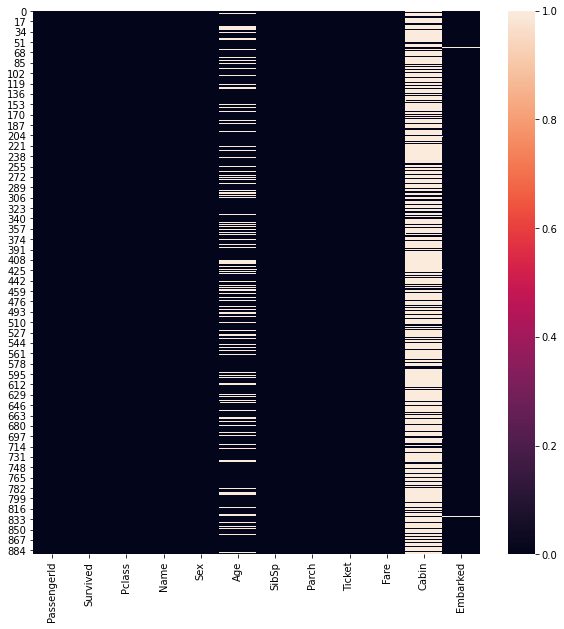

In [ ]:
# and plot them
plt.figure (figsize=(10,10))
sb.heatmap(titanic_data.isnull())

In [ ]:
# and see the % of missing data
pct_missing = np.mean(titanic_data.isnull())
print(pct_missing*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [ ]:
# Embarked varible has 2 missing values, so we can easily drop them 
titanic_data.Embarked.dropna(inplace=True)

In [ ]:
# There are 177 (20%) missing values in age varible. Let's take a look at the varible

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


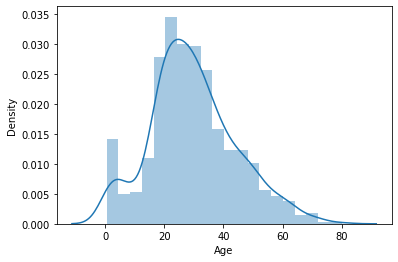

In [ ]:
# let's see the distribution of the age varible
sb.distplot(titanic_data.Age)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


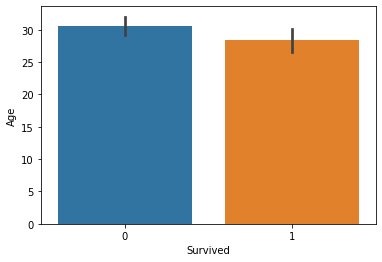

In [ ]:
sb.barplot(titanic_data.Survived, titanic_data.Age)
# We can see that mean age of survived and not survived passengers were almost the same.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


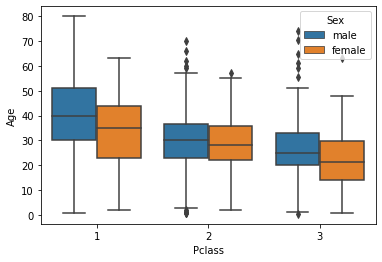

In [ ]:
sb.boxplot(titanic_data.Pclass, titanic_data.Age, hue = titanic_data.Sex)

## Let's focus on the missing values in the cabin varible as there are 77% of values missing there.
#### **Hypothesis 1**: the missing values could be connected with the passenger class. The passengers from the lower classes might not have fixed cabin number.
#### To test the hypothesis we want to check if the lower classes will have more missing values than 1st class passengers.

#### **Hypothesis 2**: the missing values could be connected with the ticket fare. The passengers with low ticket price might not have fixed cabin number.
#### To test the hypothesis we want also to check if the lower ticket fare will have more missing values.

In [ ]:
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('missing')

Text(0, 0.5, 'Number of missing values')

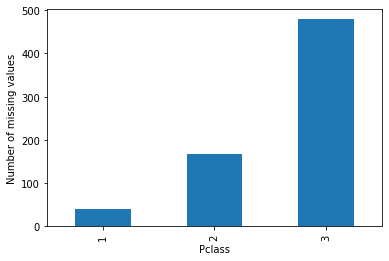

In [ ]:
titanic_data[["Pclass","Cabin"]].loc[titanic_data['Cabin'] == 'missing'].groupby(by=["Pclass"]).count().plot(kind='bar', legend=False)
plt.ylabel("Number of missing values")

#### We can confirm Hypothesis1 as we can see that 1st class passengers have less missing values

In [ ]:
titanic_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
titanic_data.loc[titanic_data["Fare"] == 0].count() #there are 15 free tickets 

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin          15
Embarked       15
dtype: int64

In [ ]:
#recoding the fare as a new varible with 4 fare types
def categorize(fare):
    if fare == 0:
        return 'Free'
    elif fare < 14:
        return 'Low Fare'
    elif fare < 31:
        return 'Medium Fare'
    else:
        return 'High Fare'
titanic_data["FareType"]= titanic_data["Fare"].apply(categorize)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,Low Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High Fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,Low Fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High Fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,Low Fare
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,missing,S,Low Fare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Medium Fare
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,missing,S,Medium Fare
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Medium Fare


Text(0, 0.5, 'Number of missing values')

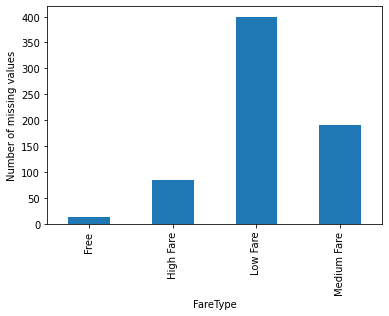

In [ ]:
titanic_data[["FareType","Cabin"]].loc[titanic_data['Cabin'] == 'missing'].groupby(by=["FareType"]).count().plot(kind="bar", legend=False)
plt.ylabel("Number of missing values")

#### We can confirm Hypothesis2 as we can see that passengers with higher ticket price have less missing values

# Correlation model

In [ ]:
# Now let's see the correlations between target (survival) and attributes (class, age, sex, number of siblings, partners and parents on board)

In [ ]:
# first we have to record sex as binary variable 1 for female and 0 for male
def encodeSex(x):
    if x=="male":
        return 0
    if x=="female":
        return 1
titanic_data['SexCode'] = titanic_data['Sex'].apply(encodeSex)

In [ ]:
def weekendYes(x):
    if x==0:
        return 0
    ifelse
        return 1
titanic_data['SexCode'] = titanic_data['Sex'].apply(encodeSex)

In [ ]:
# and now we run the regression model
pearsoncorr = titanic_data[["Survived","Pclass","Sex","Age","Fare","SibSp","Parch","SexCode"]].corr(method='pearson', min_periods=1)
pearsoncorr

,Survived,Pclass,Age,Fare,SibSp,Parch,SexCode
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629,0.543351
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443,-0.131900
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119,-0.093254
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225,0.182333
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838,0.114631
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000,0.245489
SexCode,0.543351,-0.131900,-0.093254,0.182333,0.114631,0.245489,1.000000


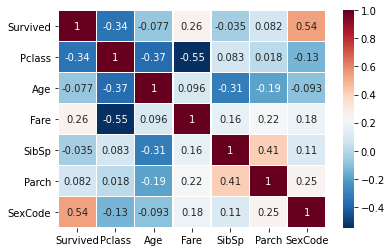

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### Insignificant correlations between survival and number of siblings, partners (-0.035) and partners (0.08) on board and age (-0.07) (might be explained by missing values). As we might expect that children would have higher survival probability ("Save women and children first!"). 
#### Significant correlation between survival and passenger class (-0.338). The class of the passenger is associated with decrease of survavival probability.  Thus, the passengers of 1st had higher chance to survive compared to the 2nd and 3rd class passengers.
#### Significant correlation between survival and ticket fare (0.257). The same mechanism for ticket fare, the higher the price the higher the probability to survive the crash. 
#### Significant correlation between survival and sex (0.54). Women were twice as likely to survive the disaster as men.

In [ ]:
# let's see if there any significant difference between two groups 
from scipy.stats import ttest_ind

In [ ]:
#let's compare two groups with t-test
titanic_survived=titanic_data[titanic_data["Survived"] == 1]

In [ ]:
titanic_not_survived=titanic_data[titanic_data["Survived"] == 0]

In [ ]:
ttest_ind(titanic_survived.SexCode, titanic_not_survived.SexCode)

Ttest_indResult(statistic=19.297816550123354, pvalue=1.4060661308802594e-69)

# Visualisation 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '% of Survived Passengers')

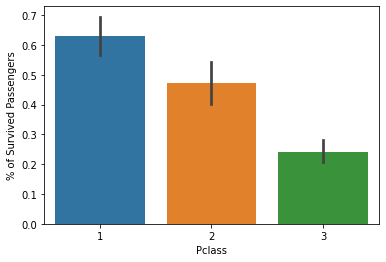

In [ ]:
# let's plot the distribution of the survived passenger in each class and fare category
sb.barplot(titanic_data.Pclass, titanic_data.Survived)
plt.ylabel("% of Survived Passengers")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'The total number of passengers')

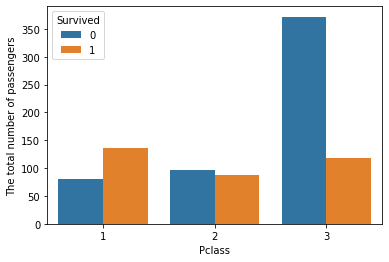

In [ ]:
sb.countplot(titanic_data.Pclass, hue=titanic_data.Survived)
plt.ylabel("The total number of passengers")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '% of Survived Passengers')

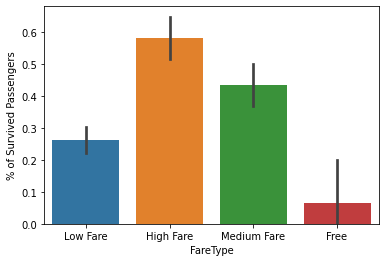

In [ ]:
sb.barplot(titanic_data.FareType, titanic_data.Survived)
plt.ylabel("% of Survived Passengers")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'The total number of passengers')

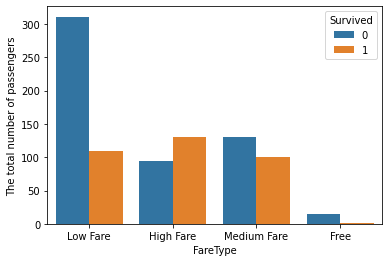

In [ ]:
sb.countplot(titanic_data.FareType, hue=titanic_data.Survived)
plt.ylabel("The total number of passengers")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


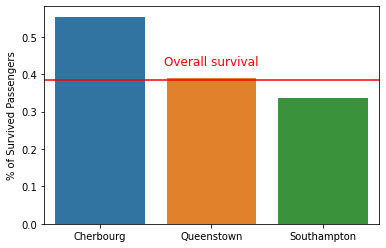

In [ ]:
# let's calculate the percentage of survival depending on the port of embarkment
survivedGivenEmbarkPort = titanic_data.groupby(by=["Embarked"])["Survived"].sum()
passengersGivenEmbarkPort = titanic_data.groupby(by=["Embarked"])["Embarked"].count()

survivalRatio=survivedGivenEmbarkPort/passengersGivenEmbarkPort

# and calculate the overall survival count
reference = titanic_data["Survived"].sum()/titanic_data["Survived"].count()
plt.axhline(y=reference, color='r', linestyle='-')
plt.text(1, reference+0.05, 'Overall survival', fontsize=12, va='center', ha='center', backgroundcolor='w', color="r")
sb.barplot(["Cherbourg","Queenstown","Southampton"], survivalRatio)
plt.ylabel("% of Survived Passengers")
plt.savefig("survivalEmbark.png")

In [ ]:
titanic_data.groupby(by=["Embarked"])["Embarked"].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '% of Survived Passengers')

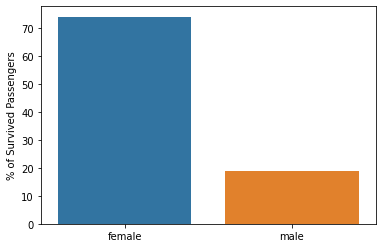

In [ ]:
# Let's check on this part the percentage of females and males that have survived on the overall number passengers
survived_bygender = titanic_data.groupby(by=['Sex'])['Survived'].sum()
total_passengers = titanic_data.groupby(by=['Sex'])['Survived'].count()

Survival_bygender_ratio = survived_bygender*100 / total_passengers
#print(Survived_bygender)
#print(total_passengers)

sb.barplot(["female","male"], Survival_bygender_ratio)
plt.ylabel("% of Survived Passengers")

###The visualisation here above shows the percentage of survivors for each gender
###And we see a significant difference between the male and female survival on the Titanic disaster.
###While on our dataset, we have more that 74% of females who survived, we can only count less 19% of male survivors

In [ ]:
import sys
sys.argv[0] 

'/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py'

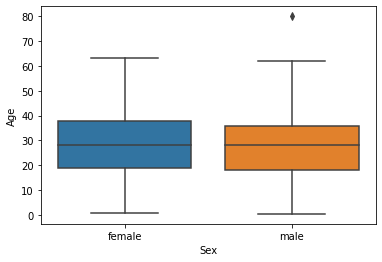

In [ ]:
# Here we are going to plot age distribution of male and female survivors
Mean_Age = titanic_data[['Survived', 'Sex', 'Age']]
Mean_Age = Mean_Age.loc[Mean_Age.Survived == 1]
sb.boxplot(x=Mean_Age.Sex, y=Mean_Age.Age)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


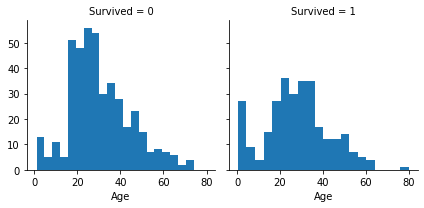

In [ ]:
#let's also see the distrubituon of the passenger age and survival level 
sb.FacetGrid(titanic_data, col='Survived').map(plt.hist, 'Age', bins=20)

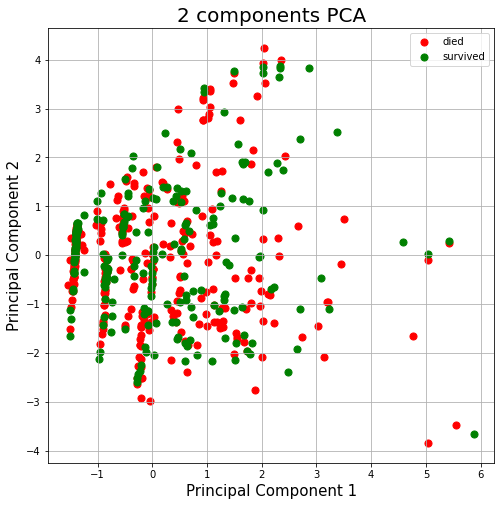

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = titanic_data.dropna().loc[:,["Pclass","Age","SibSp","Parch","Fare","SexCode"]].values
target = titanic_data.dropna().loc[:,["Survived"]].values

features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

survivedCol = titanic_data.dropna().Survived
survivedCol = survivedCol.apply(lambda x: "survived" if x==1 else "died")

finalDf = pd.concat([principalDf, survivedCol], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = ["died","survived"]
colors = ['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("PCA.png")
